In [1]:
import mst
import numpy as np
import heapq
from typing import Union

In [2]:
adjacency_mat = mst.Graph('data/small.csv')
adjacency_mat.adj_mat

array([[0., 5., 0., 5.],
       [5., 0., 1., 2.],
       [0., 1., 0., 4.],
       [5., 2., 4., 0.]])

In [4]:
len(adjacency_mat.adj_mat)

4

In [37]:
import networkx as nx
import matplotlib.pyplot as plt

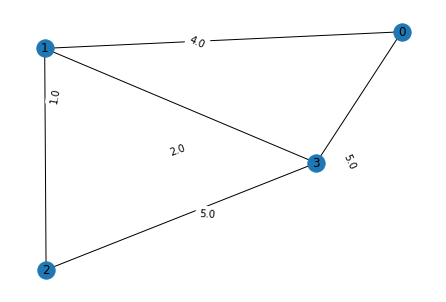

In [24]:
g_vis = nx.from_numpy_array(g)
nx.draw(g_vis, with_labels = True)
labels = nx.get_edge_attributes(g_vis,'weight')
nx.draw_networkx_edge_labels(g_vis, pos=nx.spring_layout(g_vis), edge_labels=labels)
plt.show()

In [33]:
g = adjacency_mat.adj_mat

In [34]:
g.shape[0]

4

In [35]:
type(g)

numpy.ndarray

In [37]:
start = np.random.randint(len(g))
print(start)

1


In [38]:
heap = [(0, start)]
print(heap)

[(0, 1)]


In [39]:
mst = np.zeros_like(g)
print(mst)
print(type(mst))

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
<class 'numpy.ndarray'>


In [40]:
visited = set()
visited.add(start)
print(visited)

{1}


In [41]:
total_nodes = len(g)
print(total_nodes)
print(type(total_nodes))

4
<class 'int'>


In [42]:
weight, to = heapq.heappop(heap)
print(weight, to)

0 1


In [43]:
enumerate(g[3])
print(list(enumerate(g[3])))

[(0, 5.0), (1, 2.0), (2, 4.0), (3, 0.0)]


In [44]:
g = adjacency_mat.adj_mat
start = start = np.random.randint(len(g))
visited = set([start])

total_nodes = set(range(len(g)))

mst = np.zeros_like(g)
heap = [(0, start)]

In [ ]:
print(heap)

In [ ]:
while visited != total_nodes:
    if len(heap) == 0:
        print('heap is empty')
    weight, to = heapq.heappop(heap)
    if to in visited:
        continue
    visited.add(to)
    for idx, edge_val in enumerate(g[to]):
        if edge_val != 0 and idx not in visited:
            heapq.heappush(heap, (edge_val, idx))
            mst[to, idx] = mst edge_val
            mst[idx, to] = edge_val
            
   

In [69]:
g[0,3]

5.0

In [60]:
print(range(len(g)))
print(len(g))

range(0, 4)
4


In [154]:
num_nodes = len(g)
mst=np.zeros_like(g)
#start = np.random.randint(0, num_nodes)
start = 0
edge_heap = []
heapq.heapify(edge_heap)
visited=set([start])
print(visited)

{0}


In [155]:
for n in range(num_nodes):
    weight = g[start, n]
    if weight != 0:
        heapq.heappush(edge_heap, (weight, start, n))

In [156]:
print(edge_heap)

[(5.0, 0, 1), (5.0, 0, 3)]


In [157]:
visited.add(start)

In [158]:
while len(visited) != num_nodes:
    print(edge_heap)
    weight, start, to = heapq.heappop(edge_heap)
    print(edge_heap)
    
    if to in visited:
        continue
    visited.add(to)
    mst[start,to] = mst [to, start] = weight
    
    for n in range(num_nodes):
        weight = g[to, n]
        if weight != 0:
            heapq.heappush(edge_heap, (weight, to, n))
            
mst

[(5.0, 0, 1), (5.0, 0, 3)]
[(5.0, 0, 3)]
[(1.0, 1, 2), (2.0, 1, 3), (5.0, 0, 3), (5.0, 1, 0)]
[(2.0, 1, 3), (5.0, 1, 0), (5.0, 0, 3)]
[(1.0, 2, 1), (2.0, 1, 3), (5.0, 0, 3), (5.0, 1, 0), (4.0, 2, 3)]
[(2.0, 1, 3), (4.0, 2, 3), (5.0, 0, 3), (5.0, 1, 0)]
[(2.0, 1, 3), (4.0, 2, 3), (5.0, 0, 3), (5.0, 1, 0)]
[(4.0, 2, 3), (5.0, 1, 0), (5.0, 0, 3)]


array([[0., 5., 0., 0.],
       [5., 0., 1., 2.],
       [0., 1., 0., 0.],
       [0., 2., 0., 0.]])

In [2]:
def prim(graph):
    
    if np.sum(graph) == 0:
        raise ValueError('No edge exists')
    
    num_nodes = len(graph)
    mst=np.zeros_like(graph)
    start = np.random.randint(0, num_nodes)
    edge_heap = []
    visited=set([start])
    
    for n in range(num_nodes):
        weight = graph[start, n]
        if weight == 0:
            continue
        heapq.heappush(edge_heap, (weight, start, n))
        heapq.heapify(edge_heap)
        print(edge_heap)
            
    while len(visited) != num_nodes:
        
        if len(edge_heap) == 0:
            raise ValueError('Heap is empty. Nodes are not connected')
        
        weight, start, to = heapq.heappop(edge_heap)
        heapq.heapify(edge_heap)
        #print(edge_heap)

        if to in visited:
            continue
        visited.add(to)
        mst[start,to] = mst [to, start] = weight

        for n in range(num_nodes):
            weight = graph[to, n]
            if weight != 0:
                heapq.heappush(edge_heap, (weight, to, n))
                heapq.heapify(edge_heap)
    return mst

In [151]:
mst_small = prim(g)

[(5.0, 1, 0)]
[(1.0, 1, 2), (5.0, 1, 0)]
[(1.0, 1, 2), (5.0, 1, 0), (2.0, 1, 3)]


In [148]:
mst_small

array([[0., 5., 0., 0.],
       [5., 0., 1., 2.],
       [0., 1., 0., 0.],
       [0., 2., 0., 0.]])

In [126]:
np.sum(mst_small)

16.0

In [118]:
prim(g4)

[(8, 3, 1), (9, 3, 4)]
[(6, 0, 3), (9, 3, 4), (8, 3, 1)]
[(3, 1, 2), (6, 0, 3), (5, 1, 4), (9, 3, 4), (8, 1, 3), (8, 3, 1)]
[(5, 1, 4), (6, 0, 3), (8, 3, 1), (9, 3, 4), (8, 1, 3)]
[(5, 1, 4), (6, 0, 3), (7, 2, 4), (9, 3, 4), (8, 1, 3), (8, 3, 1)]
[(6, 0, 3), (8, 1, 3), (7, 2, 4), (9, 3, 4), (8, 3, 1)]


array([[0, 2, 0, 6, 0],
       [2, 0, 3, 0, 5],
       [0, 3, 0, 0, 0],
       [6, 0, 0, 0, 0],
       [0, 5, 0, 0, 0]])

In [46]:
g[0]

array([0., 5., 0., 5.])

In [47]:
range(len(g))

range(0, 4)

In [26]:
print(g)

[[0. 5. 0. 5.]
 [5. 0. 1. 2.]
 [0. 1. 0. 4.]
 [5. 2. 4. 0.]]


In [45]:
g[0,1]

5.0

In [3]:
g2 = np.array([
    [0, 2, 3, 0, 0],
    [2, 0, 5, 3, 0],
    [3, 5, 0, 4, 0],
    [0, 3, 4, 0, 0],
    [0, 0, 0, 0, 0],
])

g4 = np.array( [[0, 2, 0, 6, 0],
               [2, 0, 3, 8, 5],
               [0, 3, 0, 0, 7],
               [6, 8, 0, 0, 9],
               [0, 5, 7, 9, 0]])


In [10]:
m = mst.Graph('data/small.csv')

In [11]:
m.construct_mst()
final = m.mst
print(final)

[[0. 5. 0. 0.]
 [5. 0. 1. 2.]
 [0. 1. 0. 0.]
 [0. 2. 0. 0.]]


In [12]:
np.sum(m.mst) // 2

8.0

In [22]:
assert np.allclose(final, final.T, rtol=1e-05, atol=1e-08) == True

In [23]:
g.shape

(4, 4)

In [24]:
final.shape

(4, 4)

In [30]:
np.count_nonzero(final) // 2

3

In [29]:
len(g)

4

In [34]:
for i in range(final.shape[0]):
    if np.count_nonzero(final[i]) == 0:
        print("True")

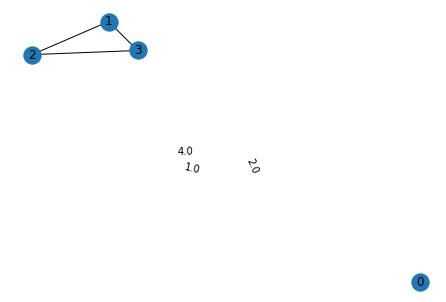

In [40]:
un = np.array([[0., 0., 0., 0.],
               [0., 0., 1., 2.],
               [0., 1., 0., 4.],
               [0., 2., 4., 0.]])

un_vis = nx.from_numpy_array(un)
nx.draw(un_vis, with_labels = True)
labels = nx.get_edge_attributes(un_vis,'weight')
nx.draw_networkx_edge_labels(un_vis, pos=nx.spring_layout(un_vis), edge_labels=labels)
plt.show()

In [7]:
g4_mst = prim(g4)
print(g4_mst)

[(6, 3, 0)]
[(6, 3, 0), (8, 3, 1)]
[(6, 3, 0), (8, 3, 1), (9, 3, 4)]
[[0 2 0 6 0]
 [2 0 3 0 5]
 [0 3 0 0 0]
 [6 0 0 0 0]
 [0 5 0 0 0]]


In [9]:
weight = np.sum(g4_mst) // 2
weight

16